# The perceptron algorithm

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(0)
dogs_whisker_length = np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=10)

cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)

In [9]:
print(np.sort(dogs_whisker_length))
np.sort(dogs_ear_flappiness_index)

[4.02272212 4.84864279 4.89678115 5.40015721 5.4105985  5.95008842
 5.97873798 6.76405235 6.86755799 7.2408932 ]


array([7.14590426, 7.79484174, 8.12167502, 8.14404357, 8.3130677 ,
       8.33367433, 8.44386323, 8.76103773, 9.45427351, 9.49407907])

In [10]:
print(np.sort(cats_ear_flappiness_index))
np.sort(cats_whisker_length)

[2.44701018 3.54563433 4.25783498 4.81281615 5.04575852 5.6536186
 5.8644362  6.46935877 6.53277921 7.26975462]


array([6.01920353, 7.11221425, 7.61267318, 7.65208785, 7.69769725,
       8.15494743, 8.15634897, 8.37816252, 9.20237985, 9.23029068])

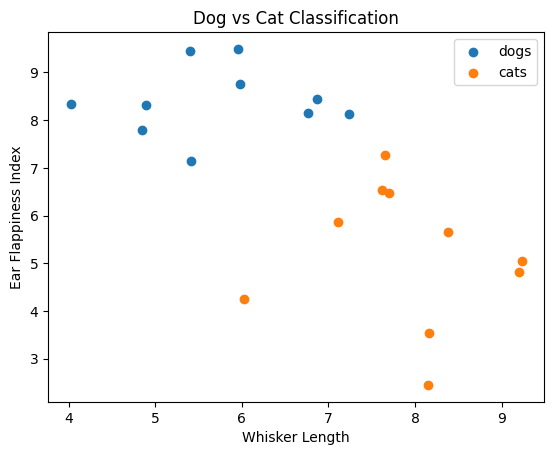

In [11]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [12]:
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T


In [13]:
this_dogs = np.vstack((dogs_data,cats_data))
correct = np.array([1]*len(dogs_data) + [-1]*len(cats_data))

#To use this data use this_dogs and correct as parameters to the perceptron algorithm

In [14]:
#Example
my_dogs = np.array([(-2,3),(0,1),(2,-1)])
my_cats = np.array([(-2,1),(0,-1),(2,-3)])

In [15]:
all_examples = np.vstack((my_dogs,my_cats))
all_examples

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [16]:
correct_output = np.array([1]*len(my_dogs) + [-1]*len(my_cats))
correct_output

array([ 1,  1,  1, -1, -1, -1])

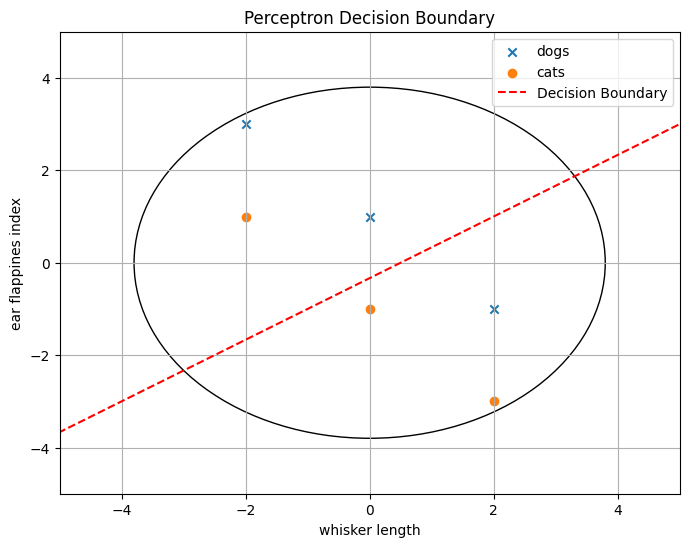

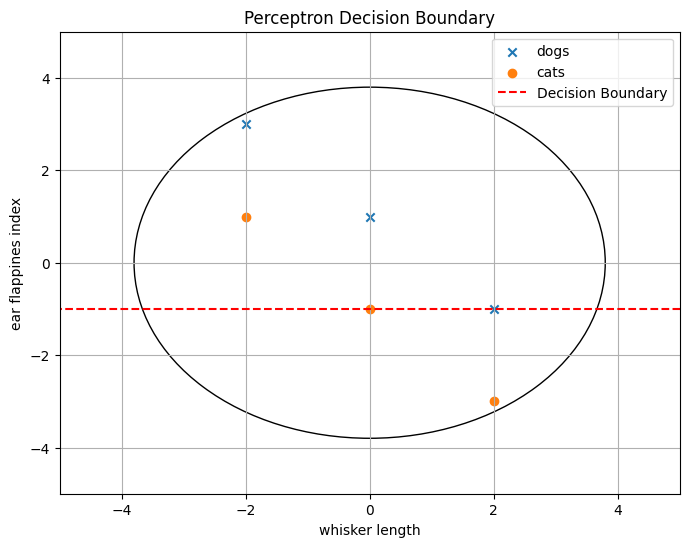

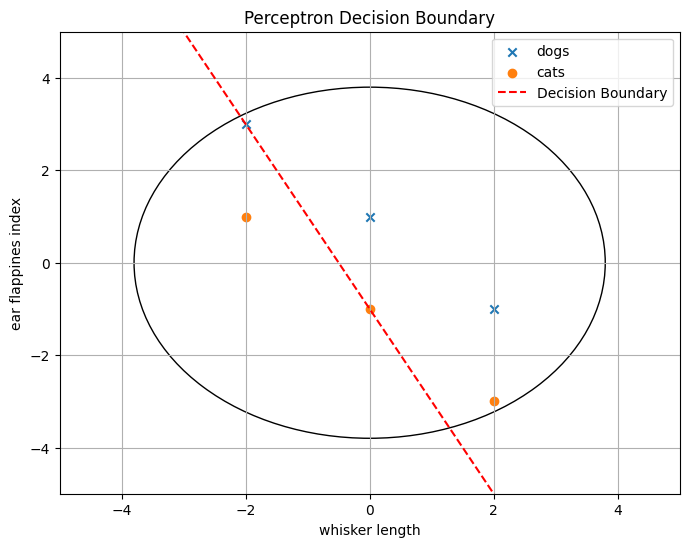

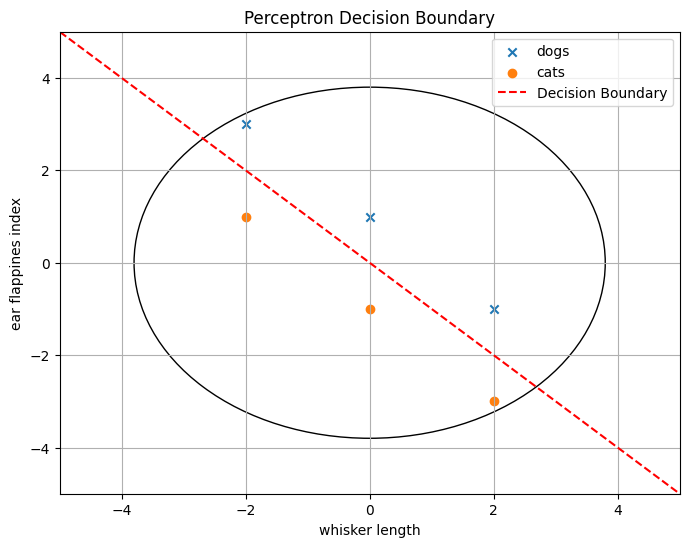

5.656854249492381
The best values of theta is [2. 2.], theta0 is 0 and the margin is 0.7071067811865475
From perceptron convergence theorem (R/r)^2 = 32.0 and number of mistakes calculated are = 4


In [93]:
#Perceptron Algorithm
def perceptron(examples,corresponding_outputs,T,d):

    #initialize the values of theta and theta0
    theta = np.zeros(shape=d)
    theta0 = 0

    no_of_mistakes = 0
    final_margin = float('inf')

    #for plotting line
    x_vals = np.linspace(-10, 10, 100)

    def plot_figure(theta,theta0):
        
        plt.figure(figsize=(8,6))  # Create a new figure for each plot
        plt.scatter(examples[0:int(len(examples)/2),0],examples[0:int(len(examples)/2),1],label='dogs',marker='x')
        plt.scatter(examples[int(len(examples)/2):,0],examples[int(len(examples)/2):,1],label='cats',marker='o')
        
        #Check for value of theta[1] (to avoid division by zero)
        if theta[1]!=0:
            y_vals = -1*(theta[0]*x_vals + theta0)/theta[1]
            plt.plot(x_vals,y_vals,color='red', linestyle='--', label='Decision Boundary')
        else:
            x_val = -theta0 / theta[0]
            plt.axvline(x=x_val)

        # Create a circle
        circle = plt.Circle((0, 0), 3.8, color='black', fill=False)  # Corrected 'fill' to False

        # Create an axis to add the circle to
        ax = plt.gca()  # Get the current axis

        # Add the circle to the axes
        ax.add_artist(circle)

        plt.title(f'Perceptron Decision Boundary')
        plt.xlabel('whisker length')
        plt.ylabel('ear flappines index')
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.grid(True)
        plt.legend()
        plt.show()

    for _ in range(T):
        for i,xi in enumerate(examples):

            if corresponding_outputs[i] * (np.dot(xi,theta)+theta0) <= 0:

                no_of_mistakes+=1
                theta += corresponding_outputs[i] * xi
                theta0 += corresponding_outputs[i]
                
                #Plot after every correction
                plot_figure(theta,theta0)
    

#Perceptron convergence theorem

    linear_sep = corresponding_outputs[i] * (np.dot(xi,theta) + theta0)
    magnitude = np.linalg.norm(theta)
            
    if magnitude != 0:
        current_margin = linear_sep / magnitude
    if current_margin < final_margin:
        final_margin = current_margin

    
    
    return theta,theta0,final_margin,no_of_mistakes

theta,theta0,final_margin,mistakes = perceptron(all_examples,correct_output,10,2)
print(4/final_margin)
print(f'The best values of theta is {theta}, theta0 is {theta0} and the margin is {final_margin}')
print(f'From perceptron convergence theorem (R/r)^2 = {np.floor(pow(4/final_margin,2))} and number of mistakes calculated are = {mistakes}')